# Projeto 1 - Ciência dos Dados

Nome: Pedro Dinacci Célia

## Por que existe paises que nunca foram membros do Conselho de Segurança das Nações Unidas?

## CSNU intro:

O Conselho de Segurança das Nações Unidas (CSNU) teve sua primeira sessão em Londres em 1946, atualmente a maioria das sessões são feitas em Nova Iorque. Essa organização das Nações Unidas é notável por dois aspectos de funcionamento: o caratér manadatório nas resoluções e o P5, que são 5 membros permanentes e tem o poder de vetar cláusulas de documentos oficiais, o P5 é composto por: Estados Unidos, Reino Unido, França, Rússia e China.

O conselho é composto por 15 membros, como já visto anteriormente 5 desses membro são permanentes, os outros 10 são eleitos de dois em dois anos ou anualmente, contudo existe paises que nunca tiveram a chance de representar o seu país na organização. É de extrema impotância ser membro do CSNU, pois muitas informações são trocadas entres os paises e muitos acordos economicos/militares são realizados.

## Hipótese e mecanismo:

O objetivo desse trabalho é tentar compreender o motivo por qual existe paises que nunca foram membros do CSNU, as hipoteses levantadas são: falta de relevancia mundial e/ou a existencia de inumeros problemas internos o que prejudicariam as ações do conselho.

Para fazer isso seram análisadas as variáves de gasto militar para indicar se um país pode ser visto com um que possui muitas perturbações. Ademais também será usado o PIB para averiguar na constação econômica dos países. Além disso a variável de Mortes em Batalha serve para apoiar a verificção se um tem problemas.

Um artigo feito pela Ethics and International Affairs ele descreve e opina sobre vários aspectos do CSNU, outrossim disserta sobre a falta de importância dos membros rotativos para a comunidade internacional. Logo, complementando a hipotese: se os membros rotativos são considerados por alguns como sem importância, imagine aqueles que nunca foram membros.

ETHICS AND INTERNATIONAL AFFAIRS. Elected Security Council Members: Power, Process, Purpose. Disponível em: https://www.ethicsandinternationalaffairs.org/2012/elected-security-council-members-power-process-purpose/. Acesso em: 27 ago. 2019.

## Bases de dados usadas

https://docs.google.com/spreadsheets/d/1HXH3ncdQLFpOXVNdC2nkPCSGz_perkfPcBeU1e2HF24/pub - Gasto militar em % do PIB

https://docs.google.com/spreadsheets/d/1ERXxEh-2Gejk5mAfqoZMkllRYu6lvEOXZKKDpuxBBlg/pub - PIB

https://docs.google.com/spreadsheets/d/15kseoFj-w39TvMl_Ije-C2TZy-DKYyECsF-uGdec0z8/pub - Mortes em Batalha

## Análise de dados

In [26]:
#Importando todas as classes necessárias.

%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt


In [27]:
#Leitura dos arquivos em Excel.

PIB = pd.read_excel('indicatorGNItotalPPP.xlsx')
Mil_exp = pd.read_excel('military expenditure.xlsx')
Mor= pd.read_excel('War age-adjusted mortality from GBD 20100812.xlsx')

In [28]:
#Transpondo e selecionando os anos a serem trabalhados.

PIB_trans=PIB.transpose()
PIB_idx=PIB_trans[PIB_trans.index>'2000']
PIB_x=PIB_idx.transpose()

In [29]:
#Indexando a tabela do PIB.

PIB_index = PIB_x.set_index('Total GNI, PPP (current international $)')

In [30]:
#Selecionando os paises a serem selecionados.

PIB_select = PIB_index.loc[['China','United States','Russia','United Kingdom','France','Israel','Belize','Mongolia','Switzerland','Afghanistan','Mozambique'],:]
#PIB_select

In [31]:
#Transpondo e selecionando os anos a serem análisados.

Mil_exp_trans = Mil_exp.transpose()
Mil_exp_idx = Mil_exp_trans[Mil_exp_trans.index>'2000']
Mil_exp_x = Mil_exp_idx.transpose()


In [32]:
#Indexando a tabela de gasto militar.

Mil_exp_index = Mil_exp_x.set_index('Military expenditure (% of GDP)')

In [33]:
#Selecionado os paises a serem trabalhados.

Mil_exp_select = Mil_exp_index.loc[['China','United States','Russia','United Kingdom','France','Israel','Belize','Mongolia','Switzerland','Afghanistan','Mozambique'],:]

In [34]:
#Indexando a tabela de mortes de batalha.

Mor_index = Mor.set_index('War, age-adjusted mortality due to')

In [35]:
#Selecionado os paises a serem trabalhados.

Mor_select = Mor_index.loc[['China','United States','Russia','United Kingdom','France','Israel','Belize','Mongolia','Switzerland','Afghanistan','Mozambique'],:]
Mor_name = Mor_select.rename(columns = {2002:'Mortos em batalha (2002)',2004:'Mortos em batalha (2004)'})

In [36]:
#Selecionando o PIB de 2010 para ser transformado em uma variável qualitativa.

PIB_2010=PIB_select.loc[:,'2010']
pib=PIB_2010.to_frame()

In [38]:
#Tranformando o PIB em uma varável qualitativa e criando uma coluna com a nova classificação.

pib.loc[pib['2010']<4e10, "class"]="pobre"
pib.loc[pib['2010']>4e10, "class"]="médio"
pib.loc[pib['2010']>3e12, "class"]="rico"
pib_class=pib.loc[:,'class']
x=pib_class.to_frame()

In [39]:
#Criando um data frame com gasto militar e a nova variávle quali.

df = Mil_exp_select.join(x, how='inner')
df

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,class
China,2.07013,2.1773,2.12041,2.07032,2.04934,2.08955,2.0541,2.03155,2.24111,2.04228,1.95186,rico
United States,3.05595,3.3684,3.74436,3.93867,4.00622,3.96305,3.98918,4.36827,4.82273,4.83336,4.71327,rico
Russia,4.08113,4.34412,4.30035,3.85266,3.7298,3.5925,3.44086,3.50802,4.36259,3.94264,3.86915,médio
United Kingdom,2.40245,2.46074,2.52325,2.45166,2.41834,2.35143,2.34586,2.48942,2.66721,2.56809,2.59461,médio
France,2.4865,2.50699,2.56212,2.57857,2.47636,2.41681,2.34647,2.33101,2.55313,2.3032,2.24884,médio
Israel,8.39279,9.63606,9.61958,8.72214,8.02784,8.10178,7.46542,7.11494,7.0022,6.54977,6.76796,médio
Belize,0.854514,0.841664,0.86521,0.899363,0.959749,1.01393,1.07695,1.37147,1.27872,1.09565,1.06513,pobre
Mongolia,1.82372,1.81032,1.52531,1.393,1.18084,1.14789,1.33558,1.18704,0.821013,0.884699,0.951643,pobre
Switzerland,1.08384,1.03464,1.0061,0.965265,0.935534,0.850891,0.811935,0.814454,0.823859,0.779555,0.853236,médio
Afghanistan,NaN,NaN,2.0076,1.99482,1.63082,1.61427,2.19546,1.91283,1.75966,3.34245,4.43604,pobre


Text(0.5, 1.0, 'Destribuição dos paises dos paises com relação ao PIB - gráfico 1')

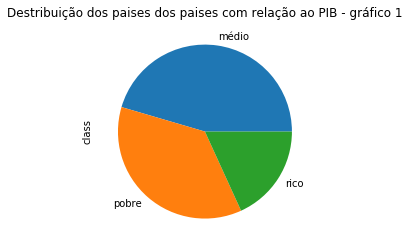

In [40]:
#Gráfico de pizza demonstrando como estão classificado os paises.

df['class'].value_counts().plot.pie()
plt.title('Destribuição dos paises dos paises com relação ao PIB - gráfico 1')

**Análise do gráfico 1:**

Esse gráfico de pizza mostra que os paises da classe média são predominantes e os ricos são minoria, contudo todos os paíse que estão na classe pobre são países que nunca foram membros.

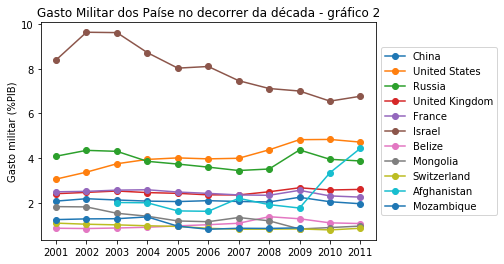

In [41]:
#Gráfico de gasto militar no decorrer no tempo.

y=df.loc[:,['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]

yt = y.transpose()

ax=plt.subplot("111")

for pais in yt.columns:
    plt.plot(yt.index,yt[pais],"-o")
    plt.legend()
    ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
    plt.title('Gasto Militar dos Paíse no decorrer da década - gráfico 2')
    plt.ylabel('Gasto militar (%PIB)')

**Análise do gráfio 2:**

É possível perceber que paises que estão involvidos em conflitos tem um gasto maior. Exemplo: Israel está em uma localiza onde se encotra perto de vários (considerados) "inimigos" isso faz com seu gatso militar seja mais alto do que todos os outros paises. O Afeganistão ter um gasto alto também era esperado pois o pais estava em guerra de 2001 a 2014. Contudo apenas dois membros do P5 estão com gastos relativamente altos, mas nunca estão diretamentes involvidos nos conflitos, todavia os outros membros do P5 estão próximo dos demais paises, que também não estão em conflitos e não tem historico de estar.  

In [42]:
#Selecionando os anos de 2002 e 2004 (gasto Militar) para compara com Mortem em batalha.

Mil_exp_02_04 = Mil_exp_select.loc[:,['2002','2004']]
mil_exp = Mil_exp_02_04.rename(columns = {'2002':'Gasto militar em 2002','2004':'Gasto militar em 2004'})

In [43]:
#Criando um data frame chamdo dado, juntando gasto militar (2002 e 2004) com mortes em batalha (2002 e 2004)  

dado = Mor_name.join(mil_exp, how='inner')
dado

,Mortos em batalha (2002),Mortos em batalha (2004),Gasto militar em 2002,Gasto militar em 2004
China,0.000000,0.000000,2.1773,2.07032
United States,0.014938,0.337659,3.3684,3.93867
Russia,11.757160,5.434431,4.34412,3.85266
United Kingdom,0.000000,0.074462,2.46074,2.45166
France,0.000000,0.001298,2.50699,2.57857
Israel,6.957225,1.863310,9.63606,8.72214
Belize,0.000000,0.000000,0.841664,0.899363
Mongolia,0.000000,0.000000,1.81032,1.393
Switzerland,0.000000,0.000000,1.03464,0.965265
Afghanistan,36.083990,9.451028,NaN,1.99482


Text(0.5, 1.0, 'Morte em batalha x Gasto militar - gráfico 3')

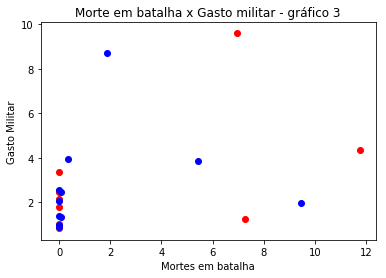

In [44]:
# Gráfico de dispersão de mortes em batalah por gasto militar. 

plt.scatter(dado['Mortos em batalha (2002)'],dado['Gasto militar em 2002'],color='r')
plt.scatter(dado['Mortos em batalha (2004)'],dado['Gasto militar em 2004'],color='b')
plt.ylabel('Gasto Militar')
plt.xlabel('Mortes em batalha')
plt.title('Morte em batalha x Gasto militar - gráfico 3')

**Análise do gráfico 3:**

A maioria dos pontos tem zero mortes em batalha, pois na década de 2000 as guerras mais impactantes foram a do Afeganistão, Iraque e guerra do líbano, que envolveram apenas Iraque , Afeganistão e EUA (vale ressalter que tiveram mais países envolvidos, mas os citados são os estudados). Ou seja, a grande maioria dos paises não estavem envolvidos em guerras.   

## Conclusão:

Após análisar os dados, é possível ver que tem paises que a maioria dos paises se encaixam em uma hipótese, exemplo: tanto Belize, quanto Mongolia e Moçambique se encaixam no perfil de serem economicamentes fracos e não são interessantes para o CSNU pois muitas parcerias economicas que visão melhorar a paz são feitas isso faz com que esses paises não sejam de tanto interesse para o conselho. 

Israel não é um pais economicamente fraco, porém como tem sempre a ameaça de paises vizinhos o CSNU também perde interesse pois os problemas de Israel podem virar foco de discussão nas sessõe do conselho fazendo com que o CSNU falhe com sua missão que é mater a paz mundial e não a paz de Israel.

Um caso interessante é o Afeganistão que se enquadra nos dois casos, de ter passado por problemas (Guerra do Afeganistão) e não tem potencial de ser um bom parceiro econômico, ou seja, as hipoteses ainda estão válidas, contudo a Suiça quebra as hipoteses pois tem uma economia forte e ao longo de sua história é famosa por não ser involver em conflitos e o mesmo vale para a década dos anos 2000's, e por que ela não está no conselho? Acontece que ela enquanto país opita por não participar do CSNU mantendo a sua politica externa de austeridade.

As hipoteses se demontram válidas em alguns casos, porém como os paises são muito diferentes e específicos é extremamente complicado determinar regras gerais pois não é uma ciência exata. 